# Objectives

*   Select the significant features based on the visual analysis
*   Check the assumptions for Linear Regression model
*   Apply the Linear Regression model and make the predictions
*   Apply the pipelines to transform the data


***


## **Setup**


I will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/) for managing the data.
 - [`numpy`](https://numpy.org/) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/) for statistical computations.


## **Import the required libraries**


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline


from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error



from sklearn.pipeline import Pipeline


## **Reading and understanding the data**


This dataset can also be found and downloaded from [kaggle.com](https://www.kaggle.com/competitions/kagglex-cohort4/data), an open public data source.
The dataset contains all the information about cars, a name of a manufacturer, all car's technical parameters and a sale price of a car.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [5]:
#join the test and trainset to ensure uniform preprocessing
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y = train_df[['price']]
combined_data = pd.concat((train_df, test_df)).reset_index(drop=True)
combined_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(combined_data.shape))

all_data size is : (90456, 12)


In [6]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


We can find more information about the features and types using the `info()`  method.


In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90456 entries, 0 to 90455
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            90456 non-null  int64 
 1   brand         90456 non-null  object
 2   model         90456 non-null  object
 3   model_year    90456 non-null  int64 
 4   milage        90456 non-null  int64 
 5   fuel_type     90456 non-null  object
 6   engine        90456 non-null  object
 7   transmission  90456 non-null  object
 8   ext_col       90456 non-null  object
 9   int_col       90456 non-null  object
 10  accident      90456 non-null  object
 11  clean_title   90456 non-null  object
dtypes: int64(3), object(9)
memory usage: 8.3+ MB


According to the output above, we have 54273 entries or rows, as well as 13 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 54273 then there is no missing values for that particular feature. The 'price' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (4 int64) and object data types (9 object).


In [8]:
combined_data.describe()

,id,model_year,milage
count,90456.000000,90456.000000,90456.000000
mean,45227.500000,2015.080769,72639.410332
std,26112.542312,5.589065,50567.715194
min,0.000000,1974.000000,100.000000
25%,22613.750000,2012.000000,32000.000000
50%,45227.500000,2016.000000,66000.000000
75%,67841.250000,2019.000000,102000.000000
max,90455.000000,2024.000000,405000.000000


## **Data Cleaning and Wrangling**


Here, we will check if we have any missing values.


In [9]:
combined_data.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

Also, check for any duplicates by running `duplicated()` function through 'car_ID' records, since each row has a unique car ID value.


In [10]:
sum(train_df.duplicated(subset = 'id')) == 0

True

Next, let's look into some of our object variables first. Using `unique()` function, we will describe all categories of the 'brand' attribute.


In [11]:
combined_data["brand"].unique()

array(['Ford', 'BMW', 'Jaguar', 'Pontiac', 'Acura', 'Audi', 'GMC',
       'Maserati', 'Chevrolet', 'Porsche', 'Mercedes-Benz', 'Tesla',
       'Lexus', 'Kia', 'Lincoln', 'Dodge', 'Volkswagen', 'Land',
       'Cadillac', 'Mazda', 'RAM', 'Subaru', 'Hyundai', 'MINI', 'Jeep',
       'Honda', 'Hummer', 'Nissan', 'Toyota', 'Volvo', 'Genesis',
       'Mitsubishi', 'Buick', 'INFINITI', 'McLaren', 'Scion',
       'Lamborghini', 'Bentley', 'Suzuki', 'Ferrari', 'Alfa',
       'Rolls-Royce', 'Chrysler', 'Aston', 'Rivian', 'Lotus', 'Saturn',
       'Lucid', 'Mercury', 'Maybach', 'FIAT', 'Plymouth', 'Bugatti',
       'Saab', 'smart'], dtype=object)

In [12]:
combined_data["model"].value_counts()

model
F-150 XLT                     1276
M3 Base                       1126
X5 xDrive35i                  1005
F-150 Lariat                   825
Mustang GT Premium             760
                              ... 
Niro EV EX                       1
GR Corolla Circuit Edition       1
F-PACE 30t R-Sport               1
TLX w/A-Spec Package             1
Model 3 Mid Range                1
Name: count, Length: 1859, dtype: int64

We can see that the 'engine' includes both the engine size, volume, number of cylinders. Next, I want to extract this values to make new features in the dataset. 


In [13]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# engine_counts = combined_data['engine'].value_counts().to_frame('count').reset_index()
# engine_counts.columns = ['engine', 'count']
# engine_counts

In [14]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# unique_engines = train_df['engine'].unique()
# pd.DataFrame(unique_engines, columns=['engine'])

In [15]:
combined_data['horse_power'] = combined_data['engine'].str.extract('(\d*\.\d+|\d+)HP', expand=False).astype(float)

In [16]:
combined_data['displacement'] = combined_data['engine'].str.extract('(\d*\.\d+|\d+)(?:L| Liter)', expand=False).astype(float)

In [17]:
combined_data['num_cylinders'] = combined_data['engine'].str.extract('([V]?)(\d+)(?: Cylinder|[\s-]?[I]?[\d]?[\d])', expand=False)[1].astype(float)

In [18]:
from datetime import datetime

# Convert model_year to datetime
combined_data['model_year'] = pd.to_datetime(combined_data['model_year'], format='%Y')

# Get the current date
current_date = datetime.now()

# Calculate the model age
combined_data['model_age'] = (current_date - combined_data['model_year']).dt.days // 365

In [19]:
combined_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horse_power,displacement,num_cylinders,model_age
0,0,Ford,F-150 Lariat,2018-01-01,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,375.0,3.5,37.0,6
1,1,BMW,335 i,2007-01-01,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,300.0,3.0,30.0,17
2,2,Jaguar,XF Luxury,2009-01-01,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,300.0,4.2,30.0,15
3,3,BMW,X7 xDrive40i,2022-01-01,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,335.0,3.0,33.0,2
4,4,Pontiac,Firebird Base,2001-01-01,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,200.0,3.8,20.0,23


In [20]:
combined_data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'horse_power', 'displacement', 'num_cylinders', 'model_age'],
      dtype='object')

In [21]:
null_cylinder_rows = combined_data[combined_data['num_cylinders'].isnull()]
null_cylinder_rows.shape

(744, 16)

In [22]:
null_horse_rows = combined_data[combined_data['horse_power'].isnull()]
null_horse_rows.shape

(6663, 16)

In [23]:
# null_horse_rows.engine.unique()

In [24]:
null_displacement_rows = combined_data[combined_data['displacement'].isnull()]
null_displacement_rows.engine.shape

(896,)

There are some typos in the names of the hos, so they should be corrected.


In [25]:
combined_data.accident.unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [26]:
combined_data['accident'] = combined_data['accident'].replace({'None reported': 0, 'At least 1 accident or damage reported': 1}).astype(int)

In [27]:
combined_data.accident.unique()

array([0, 1])

In [28]:
combined_data.int_col.unique() # drop this column

array(['Gray', 'Black', 'Beige', 'Brown', 'Silver', 'Jet Black', 'Mesa',
       'White', '–', 'Red', 'Blue', 'Medium Stone', 'Ash', 'Ebony',
       'Shara Beige', 'Tan', 'Titan Black / Quarzit', 'Global Black',
       'Orange', 'Saddle Brown', 'Nero Ade', 'Beluga', 'Light Slate',
       'Gold', 'Black Onyx', 'Nougat Brown', 'Camel', 'Hotspur Hide',
       'Charcoal', 'Satin Black', 'Deep Chestnut', 'Diesel Gray / Black',
       'White / Brown', 'AMG Black', 'Parchment', 'Shale',
       'Canberra Beige', 'Sahara Tan', 'Ebony / Pimento', 'Rhapsody Blue',
       'Medium Dark Slate', 'Rioja Red', 'Black / Express Red',
       'Deep Garnet', 'Portland', 'Sandstone', 'Dark Ash', 'Deep Cypress',
       'Black / Stone Grey', 'Chestnut', 'Navy Pier', 'Green',
       'Giallo Taurus / Nero Ade', 'Mistral Gray / Raven', 'Dark Gray',
       'Amber', 'Charles Blue', 'Hotspur', 'Medium Earth Gray', 'Ceramic',
       'Kyalami Orange', 'Charcoal Black', 'Adrenaline Red', 'Walnut',
       'Brandy', 'Bla

In [29]:
combined_data.ext_col.unique() #drop this column

array(['Blue', 'Black', 'Purple', 'Gray', 'White', 'Red', 'Silver',
       'Summit White', 'Platinum Quartz Metallic', 'Green', 'Orange',
       'Lunar Rock', 'Red Quartz Tintcoat', 'Beige', 'Gold',
       'Jet Black Mica', 'Delmonico Red Pearlcoat', 'Brown',
       'Rich Garnet Metallic', 'Stellar Black Metallic', 'Yellow',
       'Deep Black Pearl Effect', 'Metallic', 'Ice Silver Metallic',
       'Agate Black Metallic', 'Rosso Mars Metallic', 'White Clearcoat',
       'Santorini Black Metallic', 'DB Black Clearcoat',
       'Snowflake White Pearl', 'Glacial White Pearl',
       'Maximum Steel Metallic', 'Blue Caelum', 'Dark Matter Metallic',
       '–', 'Oxford White', 'Cobra Beige Metallic',
       'Velvet Red Pearlcoat', 'Python Green', 'Obsidian Black Metallic',
       'Beluga Black', 'Blue Reflex Mica', 'Sparkling Silver',
       'Black Clearcoat', 'Soul Red Crystal Metallic',
       'Bright White Clearcoat', 'Shimmering Silver',
       'Midnight Black Metallic', 'Cajun Red Tint

In [30]:
combined_data.clean_title.unique() 

array(['Yes'], dtype=object)

Let's plot and sort the total number of Brands.


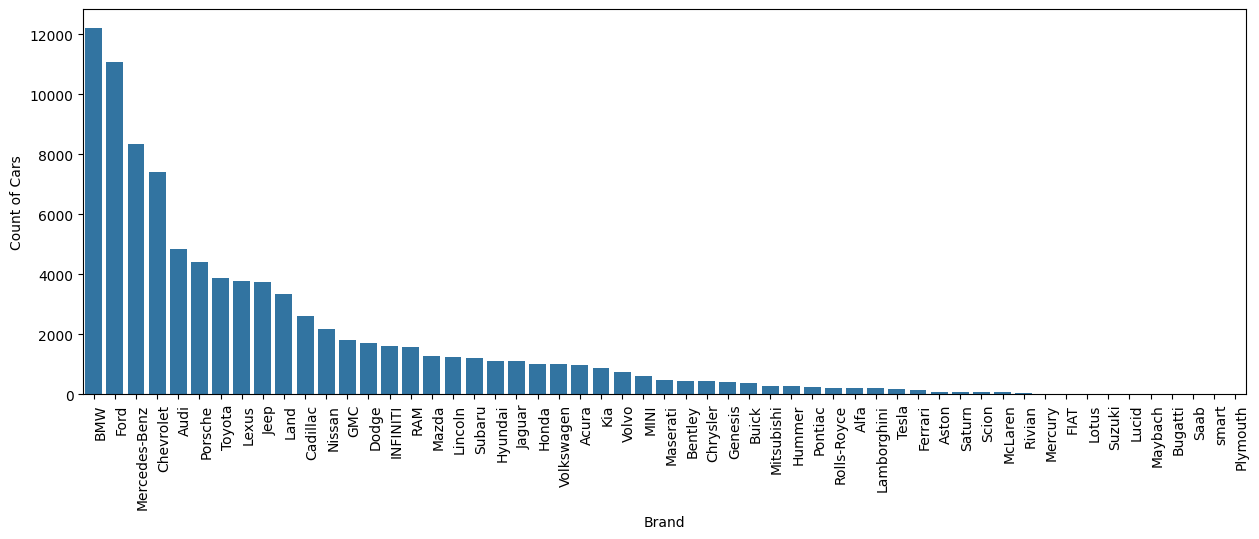

<Figure size 640x480 with 0 Axes>

In [31]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.barplot(x=pd.value_counts(combined_data['brand']).index, y=pd.value_counts(combined_data['brand']), orient='v')
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.show()
plt.tight_layout()

We can drop 'engine', 'int_col', and 'ext_col' from our data frame, since they will no longer be needed.


In [32]:
good_data = combined_data.drop(['engine', 'int_col', 'ext_col'],axis = 1)

In [33]:
good_data.tail()

,id,brand,model,model_year,milage,fuel_type,transmission,accident,clean_title,horse_power,displacement,num_cylinders,model_age
90451,90451,GMC,Yukon Denali,2019-01-01,4500,Gasoline,10-Speed A/T,0,Yes,420.0,6.2,42.0,5
90452,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004-01-01,185000,Gasoline,4-Speed A/T,1,Yes,295.0,5.3,29.0,20
90453,90453,Toyota,Corolla LE,2011-01-01,116000,Gasoline,5-Speed M/T,0,Yes,132.0,1.8,13.0,13
90454,90454,Lincoln,Navigator Reserve,2019-01-01,39000,Gasoline,10-Speed A/T,0,Yes,450.0,3.5,45.0,5
90455,90455,Chevrolet,Tahoe LT,2012-01-01,162731,E85 Flex Fuel,A/T,1,Yes,320.0,5.3,32.0,12


In [34]:
# data.info()

In [35]:
#If you need to save this partially processed data, uncomment the line below.
# data.to_csv('cleaned_car_data.csv', index=False)

## Exercise 1
In this exercise, explore any (or all) object variables of your interest.


In [36]:
# Enter your code and run the cell
good_data.head()


,id,brand,model,model_year,milage,fuel_type,transmission,accident,clean_title,horse_power,displacement,num_cylinders,model_age
0,0,Ford,F-150 Lariat,2018-01-01,74349,Gasoline,10-Speed A/T,0,Yes,375.0,3.5,37.0,6
1,1,BMW,335 i,2007-01-01,80000,Gasoline,6-Speed M/T,0,Yes,300.0,3.0,30.0,17
2,2,Jaguar,XF Luxury,2009-01-01,91491,Gasoline,6-Speed A/T,0,Yes,300.0,4.2,30.0,15
3,3,BMW,X7 xDrive40i,2022-01-01,2437,Hybrid,Transmission w/Dual Shift Mode,0,Yes,335.0,3.0,33.0,2
4,4,Pontiac,Firebird Base,2001-01-01,111000,Gasoline,A/T,0,Yes,200.0,3.8,20.0,23


In [37]:
good_data.fuel_type.value_counts()

fuel_type
Gasoline          82472
Hybrid             2878
E85 Flex Fuel      2497
Diesel             1780
–                   491
Plug-In Hybrid      330
not supported         8
Name: count, dtype: int64

In [38]:
most_frequent_fuel = good_data['fuel_type'].mode()[0]
good_data['fuel_type'].replace({'–': most_frequent_fuel}, inplace=True)
# fuel_type_dummies = pd.get_dummies(good_data['fuel_type'], prefix='fuel', drop_first=True)

# good_data = pd.concat([good_data, fuel_type_dummies], axis=1)

In [39]:
good_data.head()

,id,brand,model,model_year,milage,fuel_type,transmission,accident,clean_title,horse_power,displacement,num_cylinders,model_age
0,0,Ford,F-150 Lariat,2018-01-01,74349,Gasoline,10-Speed A/T,0,Yes,375.0,3.5,37.0,6
1,1,BMW,335 i,2007-01-01,80000,Gasoline,6-Speed M/T,0,Yes,300.0,3.0,30.0,17
2,2,Jaguar,XF Luxury,2009-01-01,91491,Gasoline,6-Speed A/T,0,Yes,300.0,4.2,30.0,15
3,3,BMW,X7 xDrive40i,2022-01-01,2437,Hybrid,Transmission w/Dual Shift Mode,0,Yes,335.0,3.0,33.0,2
4,4,Pontiac,Firebird Base,2001-01-01,111000,Gasoline,A/T,0,Yes,200.0,3.8,20.0,23


In [40]:
good_data.drop('fuel_type', axis =1 , inplace= True)

In [41]:
# most_frequent_fuel = combined_data['fuel_type'].mode()[0]
# good_data['fuel_type'].replace({'–': most_frequent_fuel}, inplace=True)

In [42]:
# # Group by brand and calculate average horse_power
# brand_avg_hp = good_data.groupby('brand')['horse_power'].mean()
# # Fill missing horse_power values with the average horse_power of the brand
# good_data['horse_power'].fillna(good_data['brand'].map(brand_avg_hp), inplace=True)


# # Group by brand and calculate average displacement
# brand_avg_disp = good_data.groupby('brand')['displacement'].mean()
# # Fill missing displacement values with the average displacement of the brand
# good_data['displacement'].fillna(good_data['brand'].map(brand_avg_disp), inplace=True)


# # Group by brand and calculate mode of num_cylinders
# brand_mode_cyl = good_data.groupby('brand')['num_cylinders'].apply(lambda x: x.mode()[0])
# # Fill missing num_cylinders values with the mode num_cylinders of the brand
# good_data['num_cylinders'].fillna(good_data['brand'].map(brand_mode_cyl), inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

good_data[['horse_power', 'num_cylinders', 'displacement']] = imputer.fit_transform(good_data[['horse_power', 'num_cylinders', 'displacement']])


In [43]:
null_rows = good_data[(good_data['displacement'].isnull()) | (good_data['horse_power'].isnull())]
null_rows

,id,brand,model,model_year,milage,transmission,accident,clean_title,horse_power,displacement,num_cylinders,model_age


In [44]:
good_data.isnull().sum()

id               0
brand            0
model            0
model_year       0
milage           0
transmission     0
accident         0
clean_title      0
horse_power      0
displacement     0
num_cylinders    0
model_age        0
dtype: int64

Next, we need to engineer some features, for better visualizations and analysis. We will group our data by 'brand', calculate the average price for each brand, and split these prices into 3 bins: 'Budget', 'Mid-Range', and 'Luxury' cars, naming the newly created column - the 'brand_category'. 


In [45]:
#data_comp_avg_horse_power = good_data[['brand','horse_power']].groupby('brand', as_index = False).mean().rename(columns={'horse_power':'brand_avg_horse_power'})


In [46]:
#good_data = good_data.merge(data_comp_avg_horse_power, on = 'brand')

We will now check the statistics of our average car price per car brand.


In [47]:
#good_data.brand_avg_horse_power.describe()

In [48]:
# #good_data['horse_power_category'] = good_data['brand_avg_horse_power'].apply(lambda x : "low" if x < 150 
#                                                      else ("medium" if 150 <= x < 300
#                                                            else "high"))

In [49]:
good_data.tail()

,id,brand,model,model_year,milage,transmission,accident,clean_title,horse_power,displacement,num_cylinders,model_age
90451,90451,GMC,Yukon Denali,2019-01-01,4500,10-Speed A/T,0,Yes,420.0,6.2,42.0,5
90452,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004-01-01,185000,4-Speed A/T,1,Yes,295.0,5.3,29.0,20
90453,90453,Toyota,Corolla LE,2011-01-01,116000,5-Speed M/T,0,Yes,132.0,1.8,13.0,13
90454,90454,Lincoln,Navigator Reserve,2019-01-01,39000,10-Speed A/T,0,Yes,450.0,3.5,45.0,5
90455,90455,Chevrolet,Tahoe LT,2012-01-01,162731,A/T,1,Yes,320.0,5.3,32.0,12


In [50]:
good_data.model.nunique() # high cadinality, needs to be dropped

1859

In [51]:
good_data.transmission.nunique()

48

In [52]:
good_data.dtypes

id                        int64
brand                    object
model                    object
model_year       datetime64[ns]
milage                    int64
transmission             object
accident                  int32
clean_title              object
horse_power             float64
displacement            float64
num_cylinders           float64
model_age                 int64
dtype: object

## **Exploratory Data Analysis**

List of Categorical Variables:
- brand
- model
- clean_title
- horse_power_category

List of numerical Variables
- id
- model_year
- mileage
- accident
- horse_power
- displacement
- brand_avg_horse_power

We will use the `boxplot()` function on the above mentioned categorical variables, to display the mean, variance, and possible outliers, with respect to the price.


In [53]:
# sns.boxplot(x = 'horse_power_category', y = y.price, data = train)
# plt.tight_layout()
# plt.show()

In [54]:
# train.horse_power_category.unique()

Next, let's view the list of top features that have high correlation coefficient. The `corr()` function calculates the Pearson'r correlation coefficients with respect to the 'price'.


In [55]:
# train_merged = train.join(y)

In [56]:
# train_merged.head()

In [57]:

# corr_matrix = good_data.corr(numeric_only=True)

# corr_matrix['price'].sort_values(ascending=False)

These are weak correlated numerical features with Car Price.


We can also use the `heatmap()` or `pairplot()` to further explore the relationship between all features and the target variables.


Use the `pairplot()` function to display the scatter plots of the relationships between the features.


In [58]:
# Enter your code and run the cell
# sns.pairplot(good_data)
# plt.show()

## **Testing Assumptions for Linear Regression**
Since we fit a linear model, we assume that the relationship between the target (price) and other features is linear. 

We also expect that the errors, or residuals, are pure random fluctuations around the true line, in other words, the variability in the response (dependent) variable doesn't increase as the value of the predictor (independent) variable increases. This is the assumption of equal variance, also known as *Homoscedasticity*. 

We also assume that the observations are independent of one another (no *multicollinearity*), and there is no correlation between the sequential observations.

If we see one of these assumptions in the dataset are not met, it's more likely that the other ones, mentioned above, will also be violated. Luckily, we can check and fix these assumptions with a few unique techniques.

Now, let's briefly touch upon each of these assumptions in our example.


### 1. Linearity Assumption

Linear regression needs the relationship between independent variable and the dependent variable to be linear. We can test this assumption with some scatter plots and regression lines. 

We will start with the 'enginesize' and 'horsepower' features.


In [59]:
# fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
# sns.scatterplot( x = good_data.horse_power, y = train_merged.price,  ax=ax1)
# sns.regplot(x=good_data.horse_power, y=train_merged.price, ax=ax1)
 
# sns.scatterplot(x = train_merged.displacement,y = train_merged.price, ax=ax2)
# sns.regplot(x=train_merged.displacement, y=train_merged.price, ax=ax2)

In [60]:
# # Enter your code and run the cell
# sns.regplot(x = train_merged.num_cylinders, y = train_merged.price)

### 2. *Homoscedasticity*

The assumption of *homoscedasticity* (constant variance), is crucial to linear regression models. *Homoscedasticity* describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable, we call it *heteroscedasticity*, opposite of *homoscedasticity*. 


In [61]:
# sns.residplot(data=train_merged, x='horse_power', y='price')

From the above plot, we can tell the error variance across the true line is dispersed somewhat not uniformly, but in a funnel like shape. So, the assumption of the *homoscedasticity* is more likely not met.


### 3. Normality
The linear regression analysis requires the dependent variable, 'price', to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. [This documentation](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411) contains more information on the normality assumption. 

Let's display all three charts to show how our target variable, 'price' behaves.


In [62]:
# def plotting_3_chart(data, feature):
#     ## Importing seaborn, matplotlab and scipy modules. 
#     import seaborn as sns
#     import matplotlib.pyplot as plt
#     import matplotlib.gridspec as gridspec
#     from scipy import stats
#     import matplotlib.style as style
#     style.use('fivethirtyeight')

#     ## Creating a customized chart. and giving in figsize and everything. 
#     fig = plt.figure(constrained_layout=True, figsize=(12,8))
#     ## creating a grid of 3 cols and 3 rows. 
#     grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#     #gs = fig3.add_gridspec(3, 3)

#     ## Customizing the histogram grid. 
#     ax1 = fig.add_subplot(grid[0, :2])
#     ## Set the title. 
#     ax1.set_title('Histogram')
#     ## plot the histogram. 
#     sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

#     # customizing the QQ_plot. 
#     ax2 = fig.add_subplot(grid[1, :2])
#     ## Set the title. 
#     ax2.set_title('QQ_plot')
#     ## Plotting the QQ_Plot. 
#     stats.probplot(data.loc[:,feature], plot = ax2)

#     ## Customizing the Box Plot. 
#     ax3 = fig.add_subplot(grid[:, 2])
#     ## Set title. 
#     ax3.set_title('Box Plot')
#     ## Plotting the box plot. 
#     sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
# plotting_3_chart(train_merged, 'price')

These three charts above can tell us a lot about our target variable:

- Our target variable, 'price' is not normally distributed
- Our target variable is right-skewed
- There are some outliers in the variable

The right-skewed plot means that most prices in the dataset are on the lower end (below 15,000). The 'max' value is very far from the '75%' quantile statistic. All these plots show that the assumption for accurate linear regression modeling is not met. 

Next, we will perform the log transformation to correct our target variable and to make it more normally distributed. 

But first, we will save our data that we have changed so far, in the 'previous_data' frame.


### 4. *Multicollinearity*

*Multicollinearity* is when there is a strong correlation between the independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. *Multicollinearity* can lead to a variety of problems, including:
- The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
- Predictors can have widely different results depending on the observations in our sample, and small changes in samples can   result in very different estimated effects.
- With very high multicollinearity, the inverse matrix, the computer calculations may not be accurate.
- We can no longer interpret a coefficient on a variable because there is no scenario in which one variable can change without a conditional change in another variable.

Using `heatmap()` function is an excellent way to identify whether there is *multicollinearity* present or not.  


In [63]:
# # Enter your code and run the cell
# num = train_merged.select_dtypes(include = ['int64', 'float64'])
# plt.figure(figsize = (30, 25))
# sns.heatmap(num.corr(), annot = True, cmap="YlGnBu")
# plt.show()   

## **Linear Regression Model**


List of significant variables after Exploratory Data Analysis :

Numerical:

- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- City mpg (miles per gallon)
- Highway mpg (miles per gallon)

Categorical:

- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Brand Category


We are going to put all the selected features into a data frame.


In [64]:
good_data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'transmission',
       'accident', 'clean_title', 'horse_power', 'displacement',
       'num_cylinders', 'model_age'],
      dtype='object')

In [65]:
columns=['brand', 'model', 'model_year', 'milage', 'transmission',
       'accident', 'clean_title', 'horse_power', 'displacement',
       'num_cylinders', 'model_age']



selected = good_data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90456 entries, 0 to 90455
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   brand          90456 non-null  object        
 1   model          90456 non-null  object        
 2   model_year     90456 non-null  datetime64[ns]
 3   milage         90456 non-null  int64         
 4   transmission   90456 non-null  object        
 5   accident       90456 non-null  int32         
 6   clean_title    90456 non-null  object        
 7   horse_power    90456 non-null  float64       
 8   displacement   90456 non-null  float64       
 9   num_cylinders  90456 non-null  float64       
 10  model_age      90456 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(4)
memory usage: 7.2+ MB


We can find the categorical columns by  iterating  through the ```dtypes```  attribute.


In [66]:
categorical_columns=[key for key, value in selected.dtypes.items()  if value=='O']
categorical_columns

['brand', 'model', 'transmission', 'clean_title']

Find the names of the  numeric columns using the list ```columns``` and assign them to the list  ```numeric_columns```.


In [67]:
# Enter your code and run the cell
numeric_columns=list(set(columns)-set(categorical_columns))
numeric_columns

['displacement',
 'model_age',
 'num_cylinders',
 'model_year',
 'horse_power',
 'accident',
 'milage']

We can split the data into the features ```X``` and target ```y```.


In [68]:
X = selected.copy()
X.shape


(90456, 11)

Before we used one-hot encoding to deal with the categorical data, let's examine the distribution of the categorical variables:


In [69]:
# for column in  categorical_columns:
#     print("column name:", column)
#     print("value_count:")
#     print( X[column].value_counts())

## Feature encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder instance
le = LabelEncoder()
# # Fit the encoder to the entire dataset (flattened)
le.fit(good_data[['brand',
 'model',
 'transmission','clean_title'
]].values.reshape(-1, 1))

# # Transform each column using the same encoder
good_data['brand'] = le.transform(good_data['brand'])
good_data['model'] = le.transform(good_data['model'])
good_data['transmission'] = le.transform(good_data['transmission'])
# good_data['clean_title'] = le.transform(good_data['clean_title'])
# good_data['horse_power_category'] = le.transform(good_data['horse_power_category'])

In [71]:
good_data['clean_title'] = good_data['clean_title'].replace({'Yes': 1}).astype(int)

In [72]:
good_data.clean_title.unique()

array([1])

In [73]:
good_data.head()

,id,brand,model,model_year,milage,transmission,accident,clean_title,horse_power,displacement,num_cylinders,model_age
0,0,765,702,2018-01-01,74349,2,0,1,375.0,3.5,37.0,6
1,1,332,56,2007-01-01,80000,128,0,1,300.0,3.0,30.0,17
2,2,953,1904,2009-01-01,91491,124,0,1,300.0,4.2,30.0,15
3,3,332,1880,2022-01-01,2437,1783,0,1,335.0,3.0,33.0,2
4,4,1269,754,2001-01-01,111000,198,0,1,200.0,3.8,20.0,23


In [74]:
def get_model_class(year):
    if year.year < 2010:
        return 'old class'
    elif 2010 <= year.year < 2015:
        return 'mid class'
    else:
        return 'modern class'

good_data['model_class'] = good_data['model_year'].apply(get_model_class)

In [75]:
good_data.head()

,id,brand,model,model_year,milage,transmission,accident,clean_title,horse_power,displacement,num_cylinders,model_age,model_class
0,0,765,702,2018-01-01,74349,2,0,1,375.0,3.5,37.0,6,modern class
1,1,332,56,2007-01-01,80000,128,0,1,300.0,3.0,30.0,17,old class
2,2,953,1904,2009-01-01,91491,124,0,1,300.0,4.2,30.0,15,old class
3,3,332,1880,2022-01-01,2437,1783,0,1,335.0,3.0,33.0,2,modern class
4,4,1269,754,2001-01-01,111000,198,0,1,200.0,3.8,20.0,23,old class


In [76]:
good_data['model_class'] = good_data['model_class'].replace({'old class': -1, 'mid class': 0, 'modern class': 1})

In [77]:
good_data['model_class'].unique()

array([ 1, -1,  0], dtype=int64)

In [78]:
good_data.drop(['model_year'], axis = 1, inplace= True)

In [79]:
good_data.isnull().sum()

id               0
brand            0
model            0
milage           0
transmission     0
accident         0
clean_title      0
horse_power      0
displacement     0
num_cylinders    0
model_age        0
model_class      0
dtype: int64

In [80]:
good_data.displacement = good_data.displacement.fillna(good_data.displacement.mean())

In [81]:
good_data.horse_power = good_data.horse_power.fillna(good_data.horse_power.mean())

In [82]:
# good_data.drop(['clean_title'], axis = 1, inplace= True)

In [83]:
train_ = good_data[:ntrain]
test_ = good_data[ntrain:]

In [84]:
train_.head()

,id,brand,model,milage,transmission,accident,clean_title,horse_power,displacement,num_cylinders,model_age,model_class
0,0,765,702,74349,2,0,1,375.0,3.5,37.0,6,1
1,1,332,56,80000,128,0,1,300.0,3.0,30.0,17,-1
2,2,953,1904,91491,124,0,1,300.0,4.2,30.0,15,-1
3,3,332,1880,2437,1783,0,1,335.0,3.0,33.0,2,1
4,4,1269,754,111000,198,0,1,200.0,3.8,20.0,23,-1


### Train Test Split

In the following Module 2: Data Splits and Cross Validation section of the Course, we will learn more about train and test split of the data deeper. But for now, we use `train_test_split()` function from *sklearn.model_selection* library to split our data into training and testing sets, using 30% of the data for testing.


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(train_, y, test_size=0.30, random_state=0)

In [87]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def grid_search_ridge(X_train, y_train):
    params_grid = {
        'alpha': [0.1, 0.5, 1, 5, 10],
        'fit_intercept': [True, False],
    }
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train.drop('id', axis=1))
    X_test_scaled = scaler.transform(X_test.drop('id', axis=1))
    
    ridge_model = Ridge()
    grid_search = GridSearchCV(estimator=ridge_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=2, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    y_pred = grid_search.predict(X_test_scaled)
    y_pred_train = grid_search.predict(X_train_scaled)
    
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    
    print('RMSE Test:', rmse_test)
    print('RMSE Train:', rmse_train)
    print('R2 Test:', r2_test)
    print('R2 Train:', r2_train)
    
    # Scale test data before predicting
    test_scaled = scaler.transform(test_.drop(['id'], axis=1))
    submission = grid_search.predict(test_scaled)
    submission_df = pd.DataFrame({'id': test_['id'], 'price': submission.flatten()})
    submission_df.to_csv('submission_ridge_4.csv', index=False)

grid_search_ridge(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
RMSE Test: 60877.217742768175
RMSE Train: 72812.63299569205
R2 Test: 0.11526862306710917
R2 Train: 0.08291041668033627


In [88]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import pandas as pd

def grid_search_ridge(X_train, y_train):
    # Define the parameter grid for Ridge regression
    params_grid = {
        'alpha': [0.1, 0.5, 1, 5, 10],
        'fit_intercept': [True, False],
    }
    
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    
    # Scale the training and test data (excluding the ID column)
    X_train_scaled = scaler.fit_transform(X_train.drop('id', axis=1))
    X_test_scaled = scaler.transform(X_test.drop('id', axis=1))
    
    # Ensure y_train is a 1-dimensional array
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    elif isinstance(y_train, pd.DataFrame):
        y_train = y_train.values.squeeze()
    y_train = y_train.ravel()
    
    # Apply Box-Cox transformation to y_train
    boxcox_price, lam = boxcox(y_train)
    
    # Initialize the Ridge regression model
    ridge_model = Ridge()
    
    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=ridge_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=2, verbose=1)
    grid_search.fit(X_train_scaled, boxcox_price)
    
    # Predict on the scaled test set
    y_pred_boxcox = grid_search.predict(X_test_scaled)
    y_pred_train_boxcox = grid_search.predict(X_train_scaled)
    
    # Apply inverse Box-Cox transformation to the predictions
    y_pred = inv_boxcox(y_pred_boxcox, lam)
    y_pred_train = inv_boxcox(y_pred_train_boxcox, lam)
    
    # Calculate RMSE and R^2 for test and train sets
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    
    print('RMSE Test:', rmse_test)
    print('RMSE Train:', rmse_train)
    print('R2 Test:', r2_test)
    print('R2 Train:', r2_train)
    
    # Scale the test_ data (excluding the ID column)
    test_scaled = scaler.transform(test_.drop(['id'], axis=1))
    submission_boxcox = grid_search.predict(test_scaled)
    submission = inv_boxcox(submission_boxcox, lam)
    
    # Create submission DataFrame and save to CSV
    submission_df = pd.DataFrame({'id': test_['id'], 'price': submission})
    submission_df.to_csv('submission_ridge__5.csv', index=False)

grid_search_ridge(X_train, y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
RMSE Test: 60881.57947047503
RMSE Train: 73122.05444077123
R2 Test: 0.11514184015073503
R2 Train: 0.0750994060116893


In [89]:
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def grid_search_xgb(X_train, y_train):
    params_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.5, 1],
        'n_estimators': [25, 50, 100],
        'gamma': [0, 0.1, 0.5],
        # 'subsample': [0.5, 0.8, 1],
        # 'colsample_bytree': [0.5, 0.8, 1],
        # 'reg_alpha': [0, 0.1, 0.5],
        # 'reg_lambda': [0, 0.1, 0.5] 
    }
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train.drop(['id'], axis=1))
    X_test_scaled = scaler.transform(X_test.drop(['id'], axis=1))
    xgb_model = XGBRegressor()
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    y_pred = grid_search.predict(X_test_scaled)
    y_pred_train = grid_search.predict(X_train_scaled)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    print('RMSE Test:', rmse_test)
    print('RMSE Train:', rmse_train)
    print('R2 Test:', r2_test)
    print('R2 Train:', r2_train)
    test_scaled = scaler.transform(test_.drop(['id'], axis=1))
    submission = grid_search.predict(test_scaled)
    submission_df = pd.DataFrame({'id': test_['id'], 'price': submission.flatten()})
    submission_df.to_csv('submission_xgb10.csv', index=False)

grid_search_xgb(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
RMSE Test: 59936.220631116674
RMSE Train: 70111.92621193567
R2 Test: 0.14240834372350186
R2 Train: 0.14968060258902183


In [90]:
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import pandas as pd

def grid_search_xgb(X_train, y_train):
    # Define the parameter grid for XGBoost
    params_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.5, 1],
        'n_estimators': [25, 50, 100],
        'gamma': [0, 0.1, 0.5],
        # 'subsample': [0.5, 0.8, 1],
        # 'colsample_bytree': [0.5, 0.8, 1],
        # 'reg_alpha': [0, 0.1, 0.5],
        # 'reg_lambda': [0, 0.1, 0.5]
    }

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the training and test data (excluding the ID column)
    X_train_scaled = scaler.fit_transform(X_train.drop('id', axis=1))
    X_test_scaled = scaler.transform(X_test.drop('id', axis=1))

    # Ensure y_train is a 1-dimensional array
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    elif isinstance(y_train, pd.DataFrame):
        y_train = y_train.values.squeeze()
    y_train = y_train.ravel()

    # Apply Box-Cox transformation to y_train
    boxcox_price, lam = boxcox(y_train)

    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor()

    # Perform GridSearchCV with 3-fold cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
    grid_search.fit(X_train_scaled, boxcox_price)

    # Predict on the scaled test set
    y_pred_boxcox = grid_search.predict(X_test_scaled)
    y_pred_train_boxcox = grid_search.predict(X_train_scaled)

    # Apply inverse Box-Cox transformation to the predictions
    y_pred = inv_boxcox(y_pred_boxcox, lam)
    y_pred_train = inv_boxcox(y_pred_train_boxcox, lam)

    # Calculate RMSE and R^2 for test and train sets
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)

    print('RMSE Test:', rmse_test)
    print('RMSE Train:', rmse_train)
    print('R2 Test:', r2_test)
    print('R2 Train:', r2_train)

    # Scale the test_ data (excluding the ID column)
    test_scaled = scaler.transform(test_.drop(['id'], axis=1))
    submission_boxcox = grid_search.predict(test_scaled)
    submission = inv_boxcox(submission_boxcox, lam)

    # Create submission DataFrame and save to CSV
    submission_df = pd.DataFrame({'id': test_['id'], 'price': submission})
    submission_df.to_csv('submission_xgb9.csv', index=False)

grid_search_xgb(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
RMSE Test: 59799.544617477026
RMSE Train: 70872.08385433727
R2 Test: 0.14631511544866282
R2 Train: 0.13114222114144058
